# Arabic Characters MNIST 
A [Kaggle Project](https://www.kaggle.com/mloey1/ahcd1) provided by [Benha University](http://bu.edu.eg/staff/mloey)

Project By: [Uzair](https://github.com/Uzair05)

## Using CSV Datasets

### Download and move data

In [ ]:
#!pip install --upgrade kaggle
!kaggle datasets download -d mloey1/ahcd1

In [ ]:
import os 
import zipfile

try:
    os.mkdir("./data/")
except Exception as err:
    print(f"Error in creating data/:\t{err}")


localzip = "./ahcd1.zip"
zip_ref = zipfile.ZipFile(localzip, 'r')
try:
    zip_ref.extractall('data/')
except Exception as err:
    print(f"Erorr in zip extraction:\t{err}")
finally:
    zip_ref.close()

### Handle Data
Create test, train and validation data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
#import random as rand

In [2]:
data = pd.read_csv("./data/csvTrainImages 13440x1024.csv")
label = pd.read_csv("./data/csvTrainLabel 13440x1.csv")

test_data = pd.read_csv('./data/csvTestImages 3360x1024.csv')
test_label = pd.read_csv('./data/csvTestLabel 3360x1.csv')

In [3]:
x_train = data.to_numpy()
x_shape, _ = x_train.shape
x_train = x_train.reshape(x_shape, 32, 32)
y_train = label.to_numpy()
y_shape, _ = y_train.shape
y_train = y_train.reshape(y_shape,)


x_test = test_data.to_numpy()
x_test_shape, _ = x_test.shape
x_test = x_test.reshape(x_test_shape, 32, 32)
y_test = test_label.to_numpy()
y_test_shape = y_test.shape
y_test = y_test.reshape(y_test_shape,)

In [4]:
for i in range(x_shape):
    x_train[i,:,:] = np.rot90(x_train[i,:,:], axes=(1,0))
for i in range(x_test_shape):
    x_test[i,:,:] = np.rot90(x_test[i,:,:], axes=(1,0))


x_train = x_train.reshape(x_shape, 32, 32, 1)
x_test = x_test.reshape(x_test_shape, 32, 32, 1)
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
y_train = y_train - 1
y_test = y_test - 1

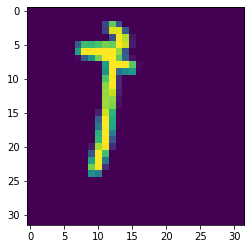

In [6]:
plt.imshow(x_train[6,:,:])

### Create Model

In [7]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        accuracy = 0.99 # Percentage Accuracy.
        if(logs.get('accuracy') != None) and (logs.get('accuracy') >= accuracy): # Experiment with changing this value
          print(f"\nReached {accuracy*100}% accuracy so cancelling training!")
          self.model.stop_training = True

callbacks = myCallback()

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(12, (3,3), activation=tf.nn.relu, padding='same', input_shape=(32,32, 1)),
    tf.keras.layers.Conv2D(32, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Conv2D(64, (3,3), activation=tf.nn.relu, padding='same'),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(28, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

2021-11-21 17:33:50.841241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-21 17:33:50.858132: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcusolver.so.11'; dlerror: libcusolver.so.11: cannot open shared object file: No such file or directory
2021-11-21 17:33:50.860647: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2021-11-21 17:33:50.862323: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 12)        120       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        3488      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 512)               33554944  
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               2

### Train Model

In [9]:
history = model.fit(
    x_train, 
    y_train, 
    epochs=15, 
    verbose=1, 
    callbacks=[callbacks],
)

Epoch 1/15
420/420 [==============================] - 122s 287ms/step - loss: 1.4454 - accuracy: 0.5385
Epoch 2/15
420/420 [==============================] - 120s 285ms/step - loss: 0.4774 - accuracy: 0.8402
Epoch 3/15
420/420 [==============================] - 119s 284ms/step - loss: 0.2615 - accuracy: 0.9132
Epoch 4/15
420/420 [==============================] - 119s 284ms/step - loss: 0.1754 - accuracy: 0.9422
Epoch 5/15
420/420 [==============================] - 119s 284ms/step - loss: 0.1156 - accuracy: 0.9622
Epoch 6/15
420/420 [==============================] - 119s 284ms/step - loss: 0.1008 - accuracy: 0.9658
Epoch 7/15
420/420 [==============================] - 119s 283ms/step - loss: 0.0662 - accuracy: 0.9786
Epoch 8/15
420/420 [==============================] - 120s 285ms/step - loss: 0.0693 - accuracy: 0.9769
Epoch 9/15
420/420 [==============================] - 119s 283ms/step - loss: 0.0598 - accuracy: 0.9808
Epoch 10/15
420/420 [==============================] - 119s 283m

### Evaluate Model

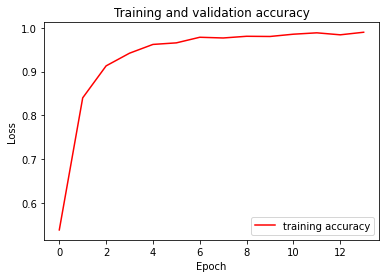

<Figure size 432x288 with 0 Axes>

In [10]:
loss, accuracy = history.history['loss'], history.history['accuracy']
plt.plot(range(len(accuracy)), accuracy, 'r', label='training accuracy')
plt.title('Training and validation accuracy')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()
plt.show()

In [11]:
model.evaluate(
    x_test,
    y_test,
    verbose=1
)

105/105 [==============================] - 5s 49ms/step - loss: 0.4216 - accuracy: 0.9131


[0.4215766489505768, 0.9130693674087524]

### Save Model

In [12]:
tf.keras.models.save_model(model, filepath="./my_model/OwnCNN_CSV_90p.h5", overwrite=True, save_format='h5')